In [1]:
import pandas as pd

heart_file_path = 'cardio_data_processed.csv'
raw_df = pd.read_csv(heart_file_path)
raw_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

X = raw_df
y = raw_df['cardio']

numerical_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']
nominal_cols = ['gender', 'cholesterol', 'smoke', 'alco', 'active']
ordinal_cols = ['gluc', 'bp_category']

# Define order for ordinal features
ord_categories = [
    [1, 2, 3],
    ['Normal', "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", "Hypertensive Crisis"]
]

# cleaner way of doing column preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numerical_cols),
        ("cat", OrdinalEncoder(handle_unknown="error"), nominal_cols),
        ("ord", OrdinalEncoder(categories=ord_categories), ordinal_cols)
    ]
)


Text(0.5, 0, 'ap_lo')

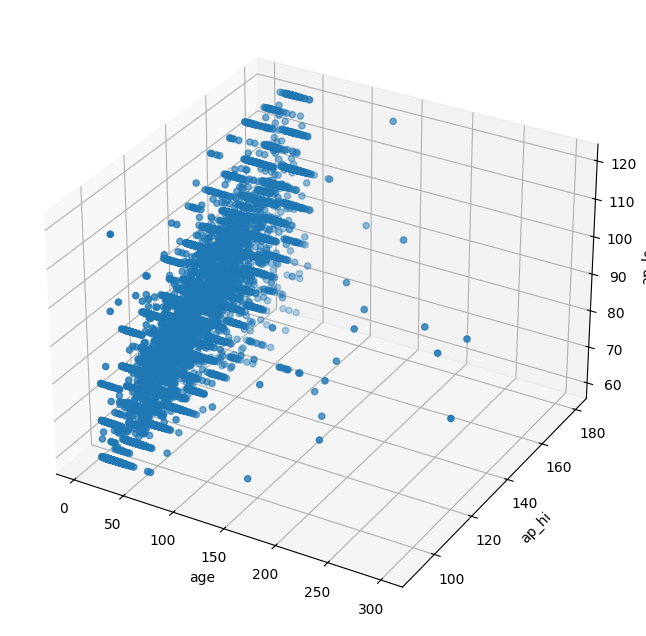

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(raw_df['bmi'], raw_df['ap_hi'], raw_df['ap_lo'])
ax.set_xlabel('age')
ax.set_ylabel('ap_hi')
ax.set_zlabel('ap_lo')

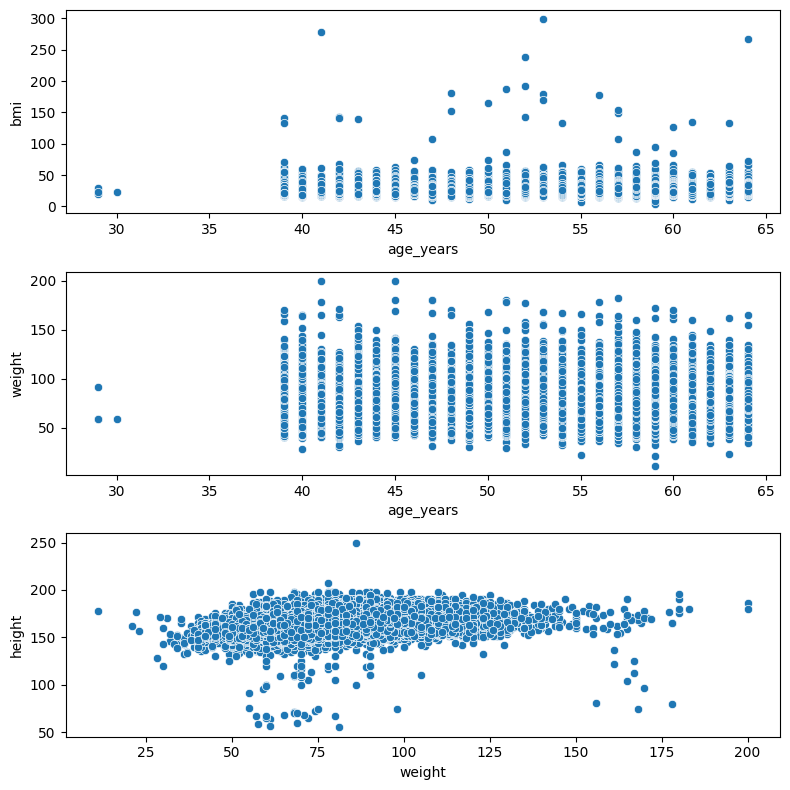

In [7]:
import seaborn as sns

def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="age_years",y="bmi", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="age_years",y="weight", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="weight",y="height", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

scatters(raw_df)

In [ ]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["age_years"], ax=ax1)
    sns.distplot(df["weight"], ax=ax2)
    sns.distplot(df[""], ax=ax3)
    plt.tight_layout()